## HR ANALYTICS : EMPLOYEE JOB CHANGE PREDICTION
#### AUTHOR : NIDHI CHANDRAMOHAN
#### CREATED : 25-SEP-2021
#### LAST UPDATED : 27-Feb-2022

#### PROJECT GOAL : PREDICT WHETHER EMPLOYEES WILL CHANGE JOB BASED ON INTERNAL TRAINING GIVEN BY COMPANY

#### Source : Kaggle

### IMPORT REQUIRED PACKAGES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### READ DATA FROM CSV FILE

In [2]:
# Read dataset
df = pd.read_csv("HR_Data.csv", header = 0)

In [24]:
df2 = pd.read_csv("HR_Data.csv", header = 0)

### CHECK THE DATA DIMENSION ( COLUMNS , ROWS )

In [3]:
df.shape

(19193, 14)

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,JobChange
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevant experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


### CHECK IF DATASET IS IMBALANCED

-- Turns out the dataset is imbalanced

In [5]:
df['JobChange'].value_counts()

0    14402
1     4791
Name: JobChange, dtype: int64

### DISPLAY FIRST FEW LINES FROM DATAFRAME

In [8]:
df.head(3)

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,JobChange
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0


### LOOK FOR NULL ( NaN ) VALUES IN DATASET

In [9]:
# Adding sum fuction to get the total number of null values in each column (attribute/feature/predictor)
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4519
relevant_experience          0
enrolled_university        386
education_level            462
major_discipline          2817
experience                  66
company_size              5953
company_type              6151
last_new_job               424
training_hours               0
JobChange                    0
dtype: int64

## PRE PROCESSING ( CLEAN/ TRANSFORM DATA AS REQUIRED)

In [10]:
# Look for unique values in "Company_size" column
print(df.company_size.unique())

# Look for unique values in "last_new_job" column
print(df.last_new_job.unique())

# Look for unique values in "experience" column
print(df.experience.unique())

[nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' 'Oct-49' '100-500'
 '500-999']
['1' '>4' 'never' '4' '3' '2' nan]
['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan]


### Dropping Unwanted Columns
##### Here enrollee_id and city

In [11]:
df = df.drop(columns = ['enrollee_id','city'])

### LABEL ENCODING

In [12]:
# USE LABEL ENCODER
# Label encoding as most columns are string
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

to_LabelEncode = df[['gender', 'relevant_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job']]

df_temp = to_LabelEncode.astype("str").apply(le.fit_transform)
df_final = df_temp.where(~to_LabelEncode.isna(), to_LabelEncode)

In [13]:
# Look for null values and NaN values in dataset
df.isnull().sum()

city_development_index       0
gender                    4519
relevant_experience          0
enrolled_university        386
education_level            462
major_discipline          2817
experience                  66
company_size              5953
company_type              6151
last_new_job               424
training_hours               0
JobChange                    0
dtype: int64

In [14]:
df.drop(['gender', 'relevant_experience','enrolled_university', 'education_level', 'major_discipline','experience', 'company_size', 'company_type', 'last_new_job'],1,inplace=True)

df = df_final.join(df)
df

,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city_development_index,training_hours,JobChange
0,1,0,3,0,5,21,NaN,NaN,0,0.920,36,1
1,1,1,3,0,5,6,3,5,4,0.776,47,0
2,NaN,1,0,0,5,15,NaN,NaN,6,0.624,83,0
3,NaN,1,NaN,0,1,20,NaN,5,6,0.789,52,1
4,1,0,3,2,5,21,3,1,3,0.767,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19188,NaN,0,0,0,5,15,3,5,0,0.754,29,0
19189,1,0,3,0,5,15,NaN,NaN,0,0.920,10,1
19190,NaN,0,3,NaN,NaN,NaN,3,5,6,0.743,12,0
19191,1,0,3,0,5,17,2,5,3,0.624,43,1


## DATA ANALYSIS

In [15]:
df.describe()

,relevant_experience,city_development_index,training_hours,JobChange
count,19193.000000,19193.000000,19193.000000,19193.000000
mean,0.279946,0.828784,65.341062,0.249622
std,0.448984,0.123378,60.035849,0.432806
min,0.000000,0.448000,1.000000,0.000000
25%,0.000000,0.740000,23.000000,0.000000
50%,0.000000,0.903000,47.000000,0.000000
75%,1.000000,0.920000,88.000000,0.000000
max,1.000000,0.949000,336.000000,1.000000


In [16]:
# Check remaining count
df.count()

gender                    14674
relevant_experience       19193
enrolled_university       18807
education_level           18731
major_discipline          16376
experience                19127
company_size              13240
company_type              13042
last_new_job              18769
city_development_index    19193
training_hours            19193
JobChange                 19193
dtype: int64

## IMPUTATION

In [17]:
from sklearn.experimental import enable_iterative_imputer

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import IterativeImputer
lr = LinearRegression()
mice_imputer = IterativeImputer(random_state=42, estimator=lr, max_iter=10, n_nearest_features=2, imputation_order = 'roman')
train_final_df = mice_imputer.fit_transform(df)

train_final_df = pd.DataFrame(train_final_df)
train_final_df.columns = ['gender', 'relevant_experience', 'enrolled_university', 'education_level', 'major_discipline',
                                                         'experience', 'company_size', 'company_type', 'last_new_job', 'city_development_index', 'training_hours', 'target']
                                                        
train_final_df

C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city_development_index,training_hours,target
0,1.000000,0.0,3.000000,0.000000,5.000000,21.000000,2.936440,4.275115,0.0,0.920,36.0,1.0
1,1.000000,1.0,3.000000,0.000000,5.000000,6.000000,3.000000,5.000000,4.0,0.776,47.0,0.0
2,0.932005,1.0,0.000000,0.000000,5.000000,15.000000,2.954278,4.135831,6.0,0.624,83.0,0.0
3,0.854382,1.0,1.992016,0.000000,1.000000,20.000000,2.705553,5.000000,6.0,0.789,52.0,1.0
4,1.000000,0.0,3.000000,2.000000,5.000000,21.000000,3.000000,1.000000,3.0,0.767,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19188,0.936150,0.0,0.000000,0.000000,5.000000,15.000000,3.000000,5.000000,0.0,0.754,29.0,0.0
19189,1.000000,0.0,3.000000,0.000000,5.000000,15.000000,2.926839,4.276441,0.0,0.920,10.0,1.0
19190,0.931689,0.0,3.000000,0.706492,4.710682,12.710373,3.000000,5.000000,6.0,0.743,12.0,0.0
19191,1.000000,0.0,3.000000,0.000000,5.000000,17.000000,2.000000,5.000000,3.0,0.624,43.0,1.0


## Exploratory Data Analysis - 1 with respect to education level 

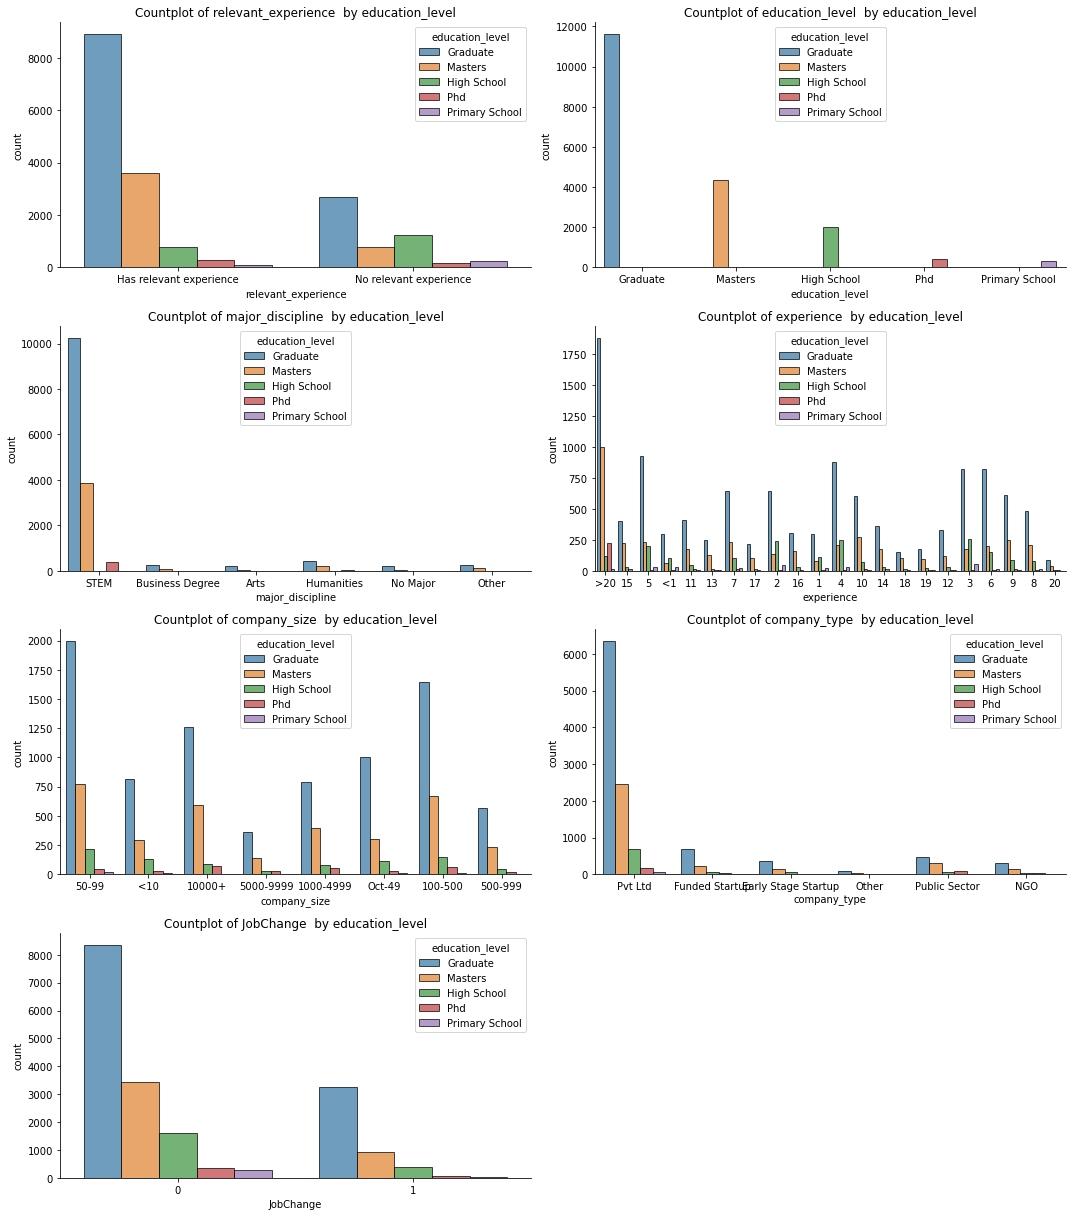

In [25]:

import matplotlib.pyplot as plt
import seaborn as sns
#Countplots showing the frequency of each category with respect to education level 
plt.figure(figsize=[15,17])
plot=["relevant_experience", "education_level","major_discipline", "experience","company_size","company_type", "JobChange"]
n=1
for f in plot:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='education_level', edgecolor="black", alpha=0.7, data=df2)
    sns.despine()
    plt.title("Countplot of {}  by education_level".format(f))
    n=n+1
plt.tight_layout()
plt.show()

## Exploratory Data Analysis - 2 with respect to Job Change

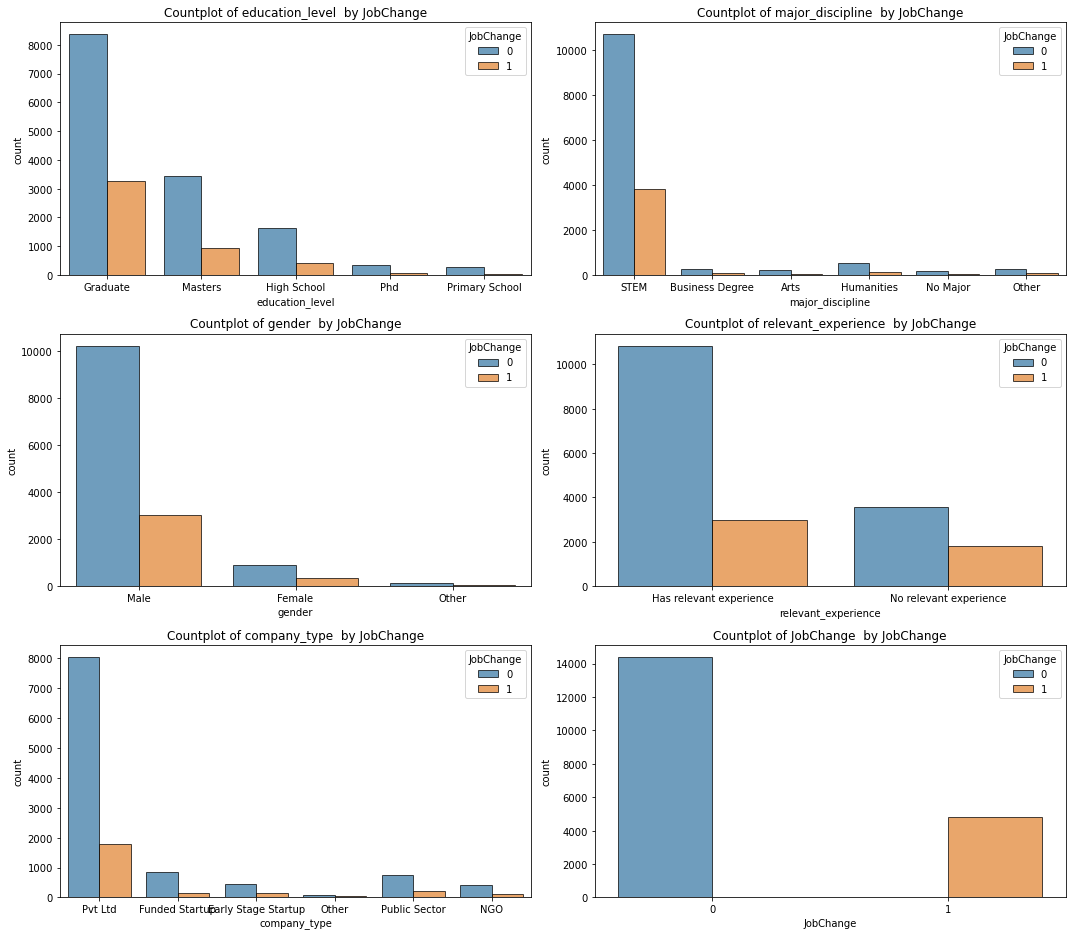

In [26]:
# Exploratory Data Analysis - 2
import matplotlib.pyplot as plt
import seaborn as sns
#Countplots showing the frequency of each category with respect to JobChange
plt.figure(figsize=[15,17])
plot=[ "education_level","major_discipline", "gender","relevant_experience","company_type", "JobChange"]
n=1
for f in plot:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='JobChange', edgecolor="black", alpha=0.7, data=df)
    #sns.despine()
    plt.title("Countplot of {}  by JobChange".format(f))
    n=n+1
plt.tight_layout()
plt.show()

## Train Test Split

In [27]:
train_final_df.head()

,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city_development_index,training_hours,target
0,1.000000,0.0,3.000000,0.0,5.0,21.0,2.936440,4.275115,0.0,0.920,36.0,1.0
1,1.000000,1.0,3.000000,0.0,5.0,6.0,3.000000,5.000000,4.0,0.776,47.0,0.0
2,0.932005,1.0,0.000000,0.0,5.0,15.0,2.954278,4.135831,6.0,0.624,83.0,0.0
3,0.854382,1.0,1.992016,0.0,1.0,20.0,2.705553,5.000000,6.0,0.789,52.0,1.0
4,1.000000,0.0,3.000000,2.0,5.0,21.0,3.000000,1.000000,3.0,0.767,8.0,0.0


In [28]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

cols =  ['city_development_index', 'gender','company_type','major_discipline',\
         'last_new_job','training_hours','relevant_experience','experience','company_size']
X = train_final_df[cols]
y = train_final_df['target']
# undersample = NearMiss(version = 1)
# sm = SMOTE(sampling_strategy='not majority')
# X, y = sm.fit_resample(X, y)


X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size=0.20, random_state=35)
print(y_test.unique())
print(y_train.unique())

[0. 1.]
[0. 1.]


## SCALING

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
from imblearn.over_sampling import SVMSMOTE
from sklearn.model_selection import train_test_split as tts
svm_smote = SVMSMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5)
X_svm_smote, y_svm_smote = svm_smote.fit_resample(X,y)

X_train_svm, X_test_svm, y_train_svm, y_test_svm = tts(X_svm_smote,y_svm_smote, test_size=0.25, random_state=42)

sc = StandardScaler()
X_train_svm = sc.fit_transform(X_train_svm)
X_test_svm = sc.transform(X_test_svm)

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train_svm,y_train_svm)
y_predict = lr.predict(X_test_svm)
print(accuracy_score(y_test_svm,y_predict))

0.6928204416053326


In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test_svm,y_predict))

              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70      3619
         1.0       0.70      0.67      0.69      3582

    accuracy                           0.69      7201
   macro avg       0.69      0.69      0.69      7201
weighted avg       0.69      0.69      0.69      7201



### DECISION TREE CLASSIFIER

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Create Decision Tree classifer object
dt = DecisionTreeClassifier(max_depth = 5)

# Train Decision Tree Classifer
dt = dt.fit(X_train_svm,y_train_svm)

#Predict the response for test dataset
y_pred_dt = dt.predict(X_test_svm)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_svm, y_pred_dt))

Accuracy: 0.7621163727260103


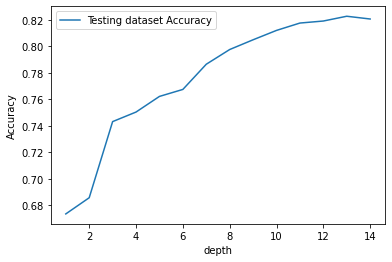

In [35]:
# Trying to find out optimal depth for tree

import matplotlib.pyplot as plt
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    dt = DecisionTreeClassifier(max_depth = k)
    dt = dt.fit(X_train_svm,y_train_svm)
    y_pred = dt.predict(X_test_svm)
     
    # test data accuracy
    test_accuracy[i] = metrics.accuracy_score(y_test_svm, y_pred)
    
 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
#plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('depth')
plt.ylabel('Accuracy')
plt.show()

## Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_svm,y_train_svm)
y_predict_rf = rf.predict(X_test_svm)
print(accuracy_score(y_test_svm,y_predict_rf))

0.8465490904041105


In [76]:
print(classification_report(y_test_svm,y_predict_rf))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      3619
           1       0.82      0.84      0.83      3582

    accuracy                           0.82      7201
   macro avg       0.82      0.82      0.82      7201
weighted avg       0.82      0.82      0.82      7201



In [39]:
pd.DataFrame({'Variable':X_train.columns,
              'Importance':rf.feature_importances_}).sort_values('Importance', ascending=False)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [46]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    errors = abs(y_pred - y_test)
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print(classification_report(y_test,y_pred))
    return evaluate

### LightGBM/Easy Ensemble Classifier

In [43]:
#pip install lightgbm

In [44]:
from lightgbm.sklearn import LGBMClassifier

In [49]:
from imblearn.ensemble import EasyEnsembleClassifier

easy_lgbm = EasyEnsembleClassifier(base_estimator= LGBMClassifier(random_state=42), n_estimators=250, n_jobs=1,
                       random_state=42, replacement=True,
                       sampling_strategy='auto', verbose=0,
                       warm_start=True)
easy_lgbm.fit(X_train_svm, y_train_svm)

EasyEnsembleClassifier(base_estimator=LGBMClassifier(random_state=42),
                       n_estimators=250, n_jobs=1, random_state=42,
                       replacement=True, warm_start=True)

#### Find Training Accuracy

In [48]:
print(classification_report(y_train_svm,easy_lgbm.predict(X_train_svm)))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88     10783
         1.0       0.88      0.88      0.88     10820

    accuracy                           0.88     21603
   macro avg       0.88      0.88      0.88     21603
weighted avg       0.88      0.88      0.88     21603



#### Test data Accuracy

In [67]:
evaluate(easy_lgbm, X_test_svm, y_test_svm)

Average Error: 0.1419 degrees.
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86      3619
         1.0       0.85      0.86      0.86      3582

    accuracy                           0.86      7201
   macro avg       0.86      0.86      0.86      7201
weighted avg       0.86      0.86      0.86      7201



<function __main__.evaluate(model, X_test, y_test)>

## KNN IMPLEMENTATION

In [55]:
# Trying KNN with K = 3 ( just some K value) 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_svm,y_train_svm)

y_predict_knn = knn.predict(X_test_svm)

# Find out prediction accuracy
print(knn.score(X_test_svm, y_test_svm))

0.7804471601166505


In [56]:
pd.crosstab(y_test_svm,y_predict_knn)

col_0,0.0,1.0
target,,
0.0,2735,884
1.0,697,2885


In [57]:
print(classification_report(y_test_svm,y_predict_knn))

              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78      3619
         1.0       0.77      0.81      0.78      3582

    accuracy                           0.78      7201
   macro avg       0.78      0.78      0.78      7201
weighted avg       0.78      0.78      0.78      7201



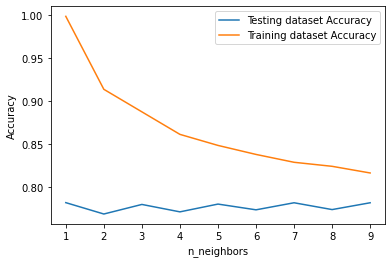

In [58]:
# Trying to find out optimal value of K

import matplotlib.pyplot as plt
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_svm, y_train_svm)
     
    # Training and test data accuracy
    train_accuracy[i] = knn.score(X_train_svm, y_train_svm)
    test_accuracy[i] = knn.score(X_test_svm, y_test_svm)
 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [60]:
from sklearn.inspection import permutation_importance
# perform permutation importance
results = permutation_importance(knn, X_test_svm, y_test_svm, scoring='accuracy')
# get importance
importance = results.importances_mean
print(importance
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

[0.13875851 0.02071934 0.06771282 0.01996945 0.04421608 0.02802389
 0.05049299 0.0399389  0.05046521]
Feature: 0, Score: 0.13876
Feature: 1, Score: 0.02072
Feature: 2, Score: 0.06771
Feature: 3, Score: 0.01997
Feature: 4, Score: 0.04422
Feature: 5, Score: 0.02802
Feature: 6, Score: 0.05049
Feature: 7, Score: 0.03994
Feature: 8, Score: 0.05047


### CONCLUSION

#### LighGBM Classifier performed best with f1-score of 86%